# Домашняя работа №7.

* Написать модель Random Forest на датасет больных сердечными болезнями (можно почистить от выбросов).

In [1]:
import pandas as pd

In [2]:
url = "http://yustiks.ru/dataset/cardio_train.csv"
data = pd.read_csv(url,sep=";")
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


Данный датасет разобран в начале лекции 5. 

In [3]:
import matplotlib.pyplot as plt

In [4]:
# data.boxplot(figsize=(15,6), rot=90)

In [5]:
# data.hist(figsize=(15,15))
# plt.show()

In [6]:
import seaborn as sns

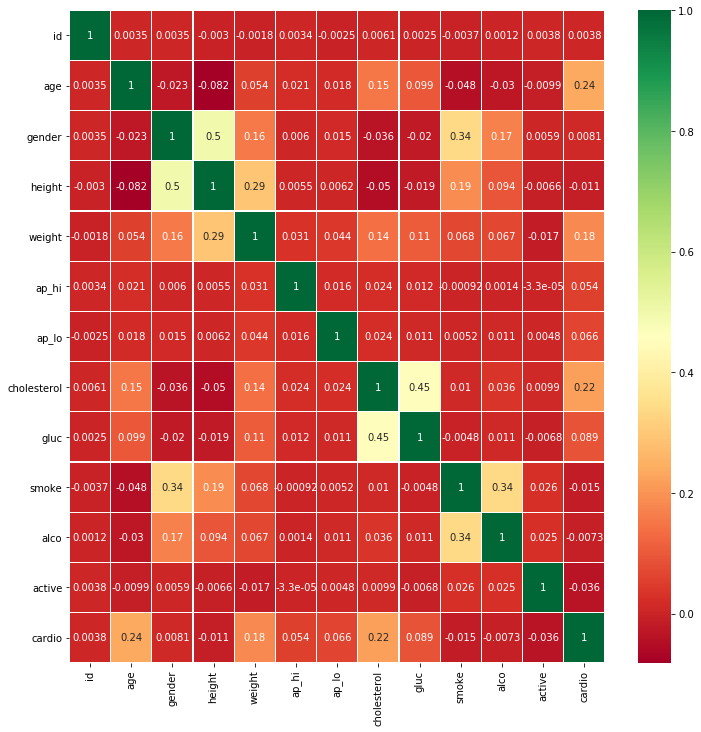

In [7]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2, xticklabels=1, yticklabels=1)
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
# data.iloc[:,1:12]

In [10]:
output_y = data.cardio
input_x = data.iloc[:,1:12]

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# targets=(output_y.iloc[:,:]==1).idxmax(1)
targets=(output_y)
print(targets.value_counts())
Y=le.fit_transform(targets)

0    35021
1    34979
Name: cardio, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

In [13]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier()

No handles with labels found to put in legend.


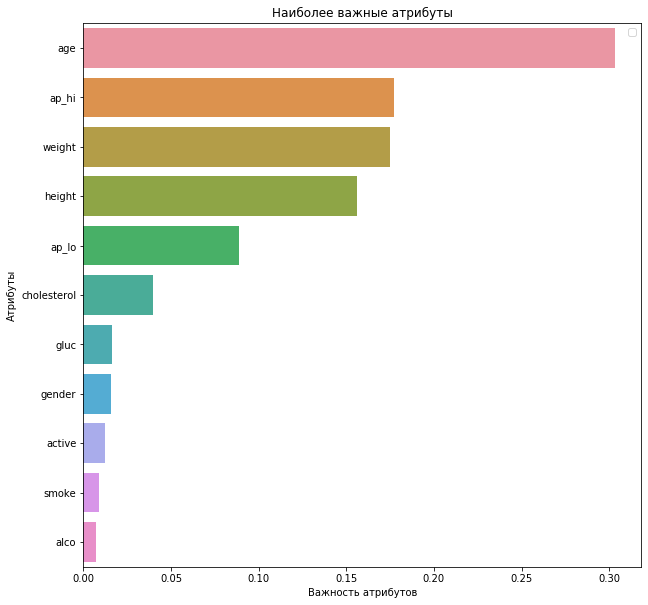

In [14]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       0.71      0.72      0.72     10540
           1       0.72      0.71      0.71     10460

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



0.7156190476190476

Модель Random Forest при обучении дает такой метод как feature importance, используя его, можно оценить, какой параметр **максимально** влияет на болезнь.

* Сделать вывод о том, какой атрибут оказывает значительное влияение на наличие или отсутствие болезни.

In [16]:
# Максимально на наличие болезни влияет возраст, т.е. болезнь более вероятна с увеличением возраста.
# далее после возраста идет верхнее АД, потом вес, болезнь чаще встречается у людей с высоким давлением и избыточным весом

Основная задача: определить, что влияет на сердечную болезнь больше всего. Например, выдвигая гипотезу о том, что тот кто курит, болеет чаще, мы сравниваем курящих пациентов с некурящими, и определяя насколько статистически значимы выборки, делаем вывод, что одна выборка статистически отличима от другой (или неотличима).
    Выдвигаем гипотезу на самый важный атрибут, полученный из feature_importance (Random_Forest). И оцениваем гипотезу. И делаем вывод.

In [17]:
# модель Random_Forest для курящих

In [18]:
output_y = data[data['smoke']==1].cardio
input_x = data[data['smoke']==1].iloc[:,1:12]

In [19]:
le=LabelEncoder()
# targets=(output_y.iloc[:,:]==1).idxmax(1)
targets=(output_y)
print(targets.value_counts())
Y=le.fit_transform(targets)

0    3240
1    2929
Name: cardio, dtype: int64


In [20]:
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

In [21]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier()

No handles with labels found to put in legend.


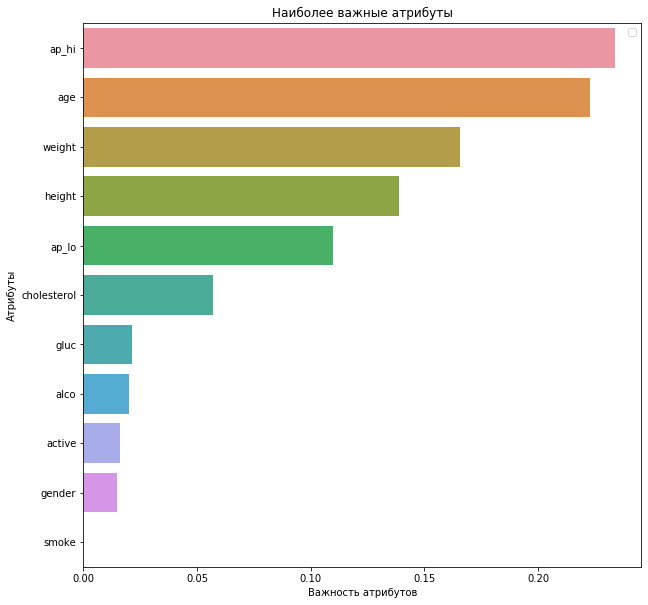

In [22]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [23]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       964
           1       0.76      0.70      0.73       887

    accuracy                           0.75      1851
   macro avg       0.75      0.75      0.75      1851
weighted avg       0.75      0.75      0.75      1851



0.7514856834143706

In [24]:
# модель Random_Forest для не курящих

In [25]:
output_y = data[data['smoke']==0].cardio
input_x = data[data['smoke']==0].iloc[:,1:12]

In [26]:
le=LabelEncoder()
# targets=(output_y.iloc[:,:]==1).idxmax(1)
targets=(output_y)
print(targets.value_counts())
Y=le.fit_transform(targets)

1    32050
0    31781
Name: cardio, dtype: int64


In [27]:
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

In [28]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier()

No handles with labels found to put in legend.


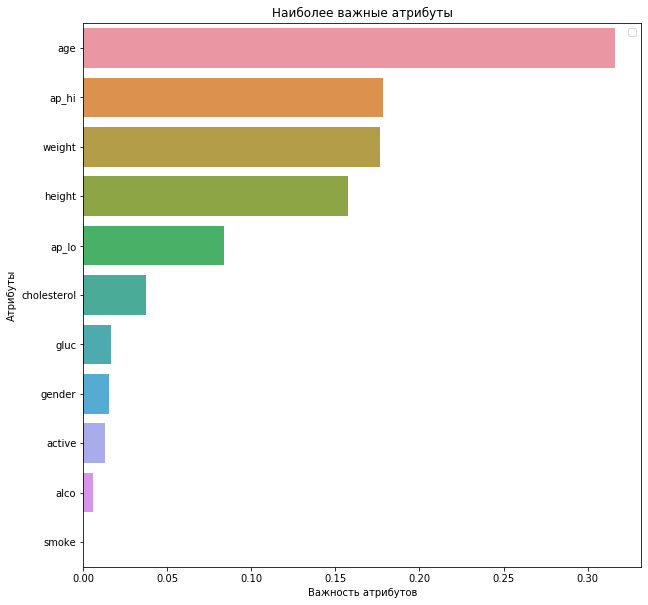

In [29]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [30]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      9574
           1       0.72      0.71      0.71      9576

    accuracy                           0.72     19150
   macro avg       0.72      0.72      0.72     19150
weighted avg       0.72      0.72      0.72     19150



0.7153524804177546

In [31]:
# Модель для некурящих похожа на модель всей генеральной совокупности по причине того, 
# что некурящих в генеральной совокупности в 10 раз больше

In [32]:
len(data[data['smoke']==0])

63831

In [33]:
len(data[data['smoke']==1])

6169

In [34]:
# pip install researchpy

In [35]:
import researchpy as rp
# Showing descriptive statistics from researchpy.summary_cont()
rp.summary_cont(data.groupby('cardio')['smoke'])

,N,Mean,SD,SE,95% Conf.,Interval
cardio,,,,,,
0,35021,0.0925,0.2898,0.0015,0.0895,0.0956
1,34979,0.0837,0.2770,0.0015,0.0808,0.0866


In [36]:
descriptives, results = rp.ttest(data[data['smoke']==1].cardio, data[data['smoke']==0].cardio)
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0    cardio   6169.0  0.474793  0.499405  0.006358   0.462329  0.487258
1    cardio  63831.0  0.502107  0.499999  0.001979   0.498228  0.505986
2  combined  70000.0  0.499700  0.500003  0.001890   0.495996  0.503404
_______________________________________
                Independent t-test     results
0  Difference (cardio - cardio) =      -0.0273
1            Degrees of freedom =   69998.0000
2                             t =      -4.0976
3         Two side test p value =       0.0000
4        Difference < 0 p value =       0.0000
5        Difference > 0 p value =       1.0000
6                     Cohen's d =      -0.0546
7                     Hedge's g =      -0.0546
8                 Glass's delta =      -0.0547
9                             r =       0.0155


In [37]:
# Two side test p value < 0.05, имеется различие между атрибутами

In [38]:
descriptives, results = rp.ttest(data[data['smoke']==1].cardio, data.cardio)
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0    cardio   6169.0  0.474793  0.499405  0.006358   0.462329  0.487258
1    cardio  70000.0  0.499700  0.500003  0.001890   0.495996  0.503404
2  combined  76169.0  0.497683  0.499998  0.001812   0.494132  0.501234
_______________________________________
                Independent t-test     results
0  Difference (cardio - cardio) =      -0.0249
1            Degrees of freedom =   76167.0000
2                             t =      -3.7510
3         Two side test p value =       0.0002
4        Difference < 0 p value =       0.0001
5        Difference > 0 p value =       0.9999
6                     Cohen's d =      -0.0498
7                     Hedge's g =      -0.0498
8                 Glass's delta =      -0.0499
9                             r =       0.0136


In [39]:
# Two side test p value < 0.05, имеется различие между атрибутами

In [40]:
descriptives, results = rp.ttest(data[data['smoke']==0].cardio, data.cardio)
print(descriptives)
print('_______________________________________')
print(results)

   Variable         N      Mean        SD        SE  95% Conf.  Interval
0    cardio   63831.0  0.502107  0.499999  0.001979   0.498228  0.505986
1    cardio   70000.0  0.499700  0.500003  0.001890   0.495996  0.503404
2  combined  133831.0  0.500848  0.500001  0.001367   0.498169  0.503527
_______________________________________
                Independent t-test      results
0  Difference (cardio - cardio) =        0.0024
1            Degrees of freedom =   133829.0000
2                             t =        0.8797
3         Two side test p value =        0.3790
4        Difference < 0 p value =        0.8105
5        Difference > 0 p value =        0.1895
6                     Cohen's d =        0.0048
7                     Hedge's g =        0.0048
8                 Glass's delta =        0.0048
9                             r =        0.0024


In [41]:
# Two side test p value > 0.05, различие между атрибутами не установлено из за того,
# что некурящих в генеральной совокупности в 10 раз больше

In [42]:
descriptives, results = rp.ttest(data.age, data.cardio)
print(descriptives)
print('_______________________________________')
print(results)

   Variable         N          Mean           SD         SE     95% Conf.  \
0       age   70000.0  19468.865814  2467.251667   9.325335  19450.588178   
1    cardio   70000.0      0.499700     0.500003   0.001890      0.495996   
2  combined  140000.0   9734.682757  9889.319511  26.430318   9682.879838   

       Interval  
0  19487.143451  
1      0.503404  
2   9786.485677  
_______________________________________
             Independent t-test      results
0  Difference (age - cardio) =    19468.3661
1         Degrees of freedom =   139998.0000
2                          t =     2087.6855
3      Two side test p value =        0.0000
4     Difference < 0 p value =        1.0000
5     Difference > 0 p value =        0.0000
6                  Cohen's d =       11.1591
7                  Hedge's g =       11.1591
8              Glass's delta =        7.8907
9                          r =        0.9843


In [43]:
# Two side test p value < 0.05, имеется различие между атрибутами

In [44]:
# сравним заболеваемость людей с весом выше среднего со всей совокупностью

In [45]:
descriptives, results = rp.ttest(data[data['weight']>data['weight'].mean()]['cardio'], data['cardio'])
print(descriptives)
print('_______________________________________')
print(results)

   Variable         N      Mean        SD        SE  95% Conf.  Interval
0    cardio   30303.0  0.587500  0.492292  0.002828   0.581957  0.593043
1    cardio   70000.0  0.499700  0.500003  0.001890   0.495996  0.503404
2  combined  100303.0  0.526226  0.499314  0.001577   0.523135  0.529316
_______________________________________
                Independent t-test      results
0  Difference (cardio - cardio) =        0.0878
1            Degrees of freedom =   100301.0000
2                             t =       25.6550
3         Two side test p value =        0.0000
4        Difference < 0 p value =        1.0000
5        Difference > 0 p value =        0.0000
6                     Cohen's d =        0.1764
7                     Hedge's g =        0.1764
8                 Glass's delta =        0.1783
9                             r =        0.0807


In [46]:
# Two side test p value < 0.05, имеется различие между атрибутами

In [47]:
# сравним заболеваемость людей с весом выше среднего с заболеваемостью людей с весом ниже среднего

In [48]:
descriptives, results = rp.ttest(data[data['weight']>data['weight'].mean()]['cardio'], data[data['weight']<data['weight'].mean()]['cardio'])
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0    cardio  30303.0  0.587500  0.492292  0.002828   0.581957  0.593043
1    cardio  39697.0  0.432678  0.495453  0.002487   0.427804  0.437552
2  combined  70000.0  0.499700  0.500003  0.001890   0.495996  0.503404
_______________________________________
                Independent t-test     results
0  Difference (cardio - cardio) =       0.1548
1            Degrees of freedom =   69998.0000
2                             t =      41.0773
3         Two side test p value =       0.0000
4        Difference < 0 p value =       1.0000
5        Difference > 0 p value =       0.0000
6                     Cohen's d =       0.3133
7                     Hedge's g =       0.3133
8                 Glass's delta =       0.3145
9                             r =       0.1534


In [49]:
# Two side test p value < 0.05, имеется различие между атрибутами

In [50]:
# сравним заболеваемость людей сверхним АД выше среднего со всей совокупностью

In [51]:
data['ap_hi'].mean()

128.8172857142857

In [52]:
descriptives, results = rp.ttest(data[data['ap_hi']>data['ap_hi'].mean()]['cardio'], data['cardio'])
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0    cardio  28680.0  0.760635  0.426704  0.002520   0.755696  0.765573
1    cardio  70000.0  0.499700  0.500003  0.001890   0.495996  0.503404
2  combined  98680.0  0.575537  0.494264  0.001573   0.572453  0.578621
_______________________________________
                Independent t-test     results
0  Difference (cardio - cardio) =       0.2609
1            Degrees of freedom =   98678.0000
2                             t =      77.5613
3         Two side test p value =       0.0000
4        Difference < 0 p value =       1.0000
5        Difference > 0 p value =       0.0000
6                     Cohen's d =       0.5438
7                     Hedge's g =       0.5438
8                 Glass's delta =       0.6115
9                             r =       0.2397


In [53]:
# Two side test p value < 0.05, имеется различие между атрибутами

In [54]:
# сравним заболеваемость курящих людей с верхним АД выше среднего со всей совокупностью

In [55]:
smoke_ap_hi = data.loc[(data['smoke']==1) & (data['ap_hi']>data['ap_hi'].mean())]

In [56]:
# smoke_ap_hi

In [57]:
descriptives, results = rp.ttest(smoke_ap_hi['cardio'], data['cardio'])
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0    cardio   2841.0  0.729321  0.444389  0.008337   0.712973  0.745669
1    cardio  70000.0  0.499700  0.500003  0.001890   0.495996  0.503404
2  combined  72841.0  0.508656  0.499929  0.001852   0.505025  0.512286
_______________________________________
                Independent t-test     results
0  Difference (cardio - cardio) =       0.2296
1            Degrees of freedom =   72839.0000
2                             t =      24.0947
3         Two side test p value =       0.0000
4        Difference < 0 p value =       1.0000
5        Difference > 0 p value =       0.0000
6                     Cohen's d =       0.4611
7                     Hedge's g =       0.4611
8                 Glass's delta =       0.5167
9                             r =       0.0889


In [58]:
# Two side test p value < 0.05, имеется различие между атрибутами

In [59]:
# сравним заболеваемость людей с верхним АД выше среднего и весом выше среднего со всей совокупностью

In [60]:
weight_ap_hi = data.loc[(data['weight']>data['weight'].mean()) & (data['ap_hi']>data['ap_hi'].mean())]

In [61]:
# weight_ap_hi

In [62]:
descriptives, results = rp.ttest(weight_ap_hi['cardio'], data['cardio'])
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0    cardio  16188.0  0.771621  0.419801  0.003299   0.765154  0.778088
1    cardio  70000.0  0.499700  0.500003  0.001890   0.495996  0.503404
2  combined  86188.0  0.550773  0.497418  0.001694   0.547452  0.554094
_______________________________________
                Independent t-test     results
0  Difference (cardio - cardio) =       0.2719
1            Degrees of freedom =   86186.0000
2                             t =      64.1612
3         Two side test p value =       0.0000
4        Difference < 0 p value =       1.0000
5        Difference > 0 p value =       0.0000
6                     Cohen's d =       0.5596
7                     Hedge's g =       0.5596
8                 Glass's delta =       0.6477
9                             r =       0.2135


In [63]:
# Two side test p value < 0.05, имеется различие между атрибутами